In [84]:
import librosa
import numpy as np

# Read the audio file using librosa
audio_data, sampling_rate = librosa.load( r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav", sr=None, mono=True)

# Normalize the audio data to the range [-1, 1]
audio_data /= np.max(np.abs(audio_data), axis=0)

# Now, 'audio_data' contains the audio data as a NumPy array
print(audio_data)


[ 0.0000000e+00 -4.2795396e-05  1.7118159e-04 ...  9.1154194e-03
  9.3721915e-03  9.5005780e-03]


In [85]:
import librosa
import numpy as np

# Read the audio file using librosa
audio_data1, sampling_rate = librosa.load(r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix010_ov1.wav", sr=None, mono=True)

# Normalize the audio data to the range [-1, 1]
audio_data1 /= np.max(np.abs(audio_data), axis=0)

# Now, 'audio_data' contains the audio data as a NumPy array
print(audio_data1)

[0.00029755 0.00032043 0.0003891  ... 0.00055695 0.0006485  0.00070953]


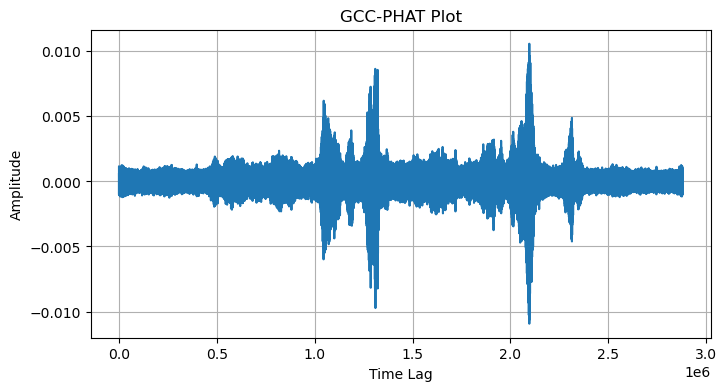

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Generate two example audio signals (replace these with your audio data)
signal1 = audio_data  # 1 kHz sine wave
signal2 = audio_data1  # Delayed version of the first signal (50 ms delay)

# Compute cross-correlation of the two signals
correlation = correlate(signal1, signal2, mode='full')

# Compute the GCC-PHAT transformation
phat = np.angle(np.fft.fft(correlation))
gcc_phat = np.fft.ifft(np.exp(1j * phat))

# Plot the GCC-PHAT result
plt.figure(figsize=(8, 4))
plt.plot(gcc_phat)
plt.title('GCC-PHAT Plot')
plt.xlabel('Time Lag')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

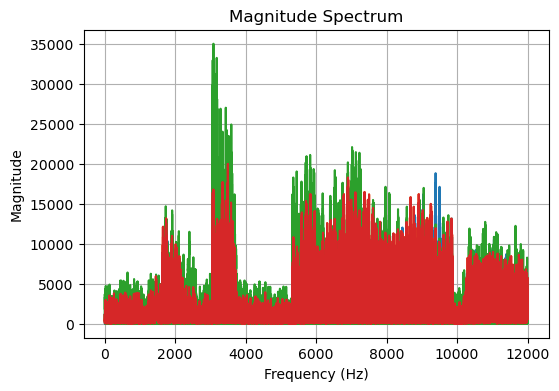

In [78]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load the audio file (replace 'your_audio_file.wav' with the actual file path)
sampling_rate, audio_data = wav.read(r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix002_ov1.wav")

# Compute the magnitude spectrum using Fourier transform
magnitude_spectrum = np.abs(np.fft.fft(audio_data))

# Frequency values corresponding to the FFT result
frequencies = np.fft.fftfreq(len(magnitude_spectrum), 1 / sampling_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(6, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude_spectrum[:len(frequencies)//2])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


[-3.3287219e-07 -6.4464448e-06  3.6819805e-05 ...  1.5896140e-03
  1.6828531e-03  1.6840354e-03]
22050


<Figure size 2000x500 with 0 Axes>

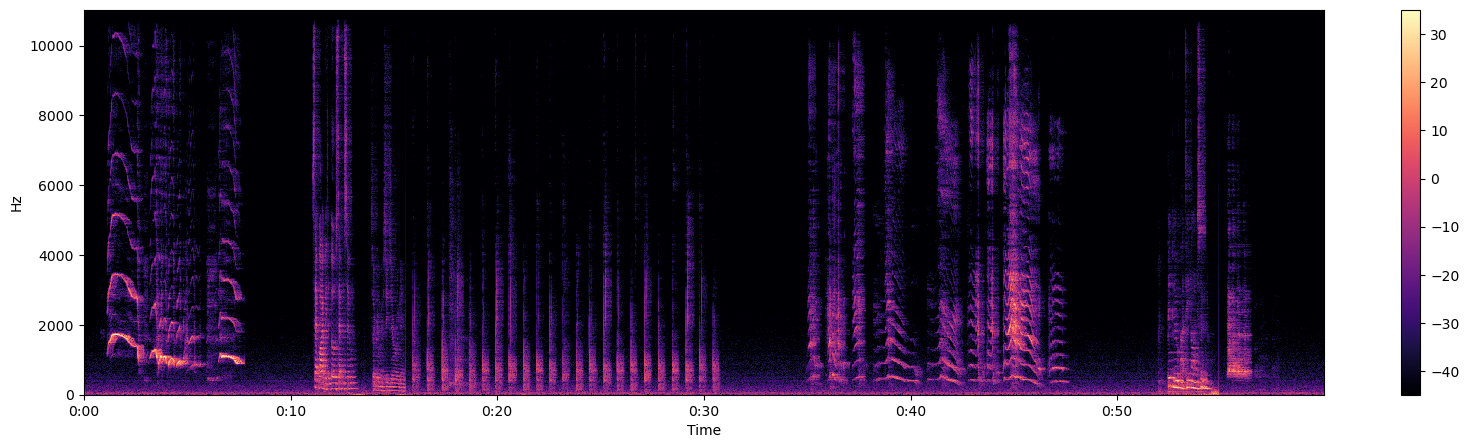

In [5]:
import warnings
warnings.filterwarnings('ignore')

import librosa
audio_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
x , sr = librosa.load(audio_path)

print(x)
print(sr)

import IPython.display as ipd
ipd.Audio(audio_path)

%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.load(audio_path)
plt.show()

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

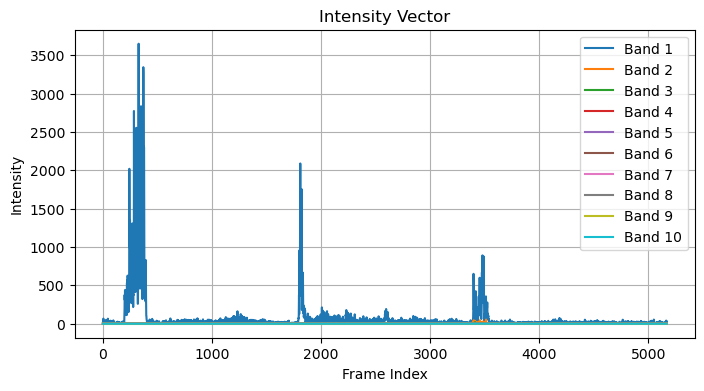

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to compute intensity vector from an audio file
def compute_intensity_vector(audio_file, num_bands=10, frame_length=2048, hop_length=512, sampling_rate=44100):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=sampling_rate)
    
    # Compute the power spectrum of the audio signal
    power_spectrum = np.abs(librosa.stft(y=audio_signal, n_fft=frame_length, hop_length=hop_length)) ** 2
    
    # Define frequency bands
    frequency_bands = np.linspace(0, sampling_rate / 2, num=num_bands+1, endpoint=True)
    
    # Compute intensity vector
    intensity_vector = []
    for i in range(len(frequency_bands) - 1):
        lower_bound = int(frequency_bands[i] / (sampling_rate / frame_length))
        upper_bound = int(frequency_bands[i + 1] / (sampling_rate / frame_length))
        intensity = np.sum(power_spectrum[lower_bound:upper_bound, :], axis=0)
        intensity_vector.append(intensity)
    
    return np.array(intensity_vector)

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix009_ov1.wav"
intensity_vector = compute_intensity_vector(audio_file, num_bands=10)

# Plot the intensity vector
plt.figure(figsize=(8, 4))
for i, intensity_band in enumerate(intensity_vector):
    plt.plot(intensity_band, label=f'Band {i + 1}')

plt.xlabel('Frame Index')
plt.ylabel('Intensity')
plt.title('Intensity Vector')
plt.legend()
plt.grid(True)
plt.show()


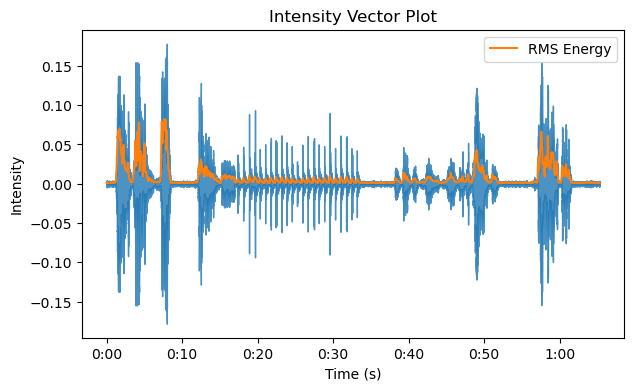

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Calculate the root mean square (RMS) energy of the audio signal
rms_energy = librosa.feature.rms(y=y)[0]

# Plot the intensity vector (RMS energy) over time
plt.figure(figsize=(7, 4))
librosa.display.waveshow(y, alpha=0.8)  # Display the waveform as the background
plt.plot(librosa.times_like(rms_energy), rms_energy, label='RMS Energy')
plt.xlabel("Time (s)")
plt.ylabel("Intensity")
plt.legend()
plt.title("Intensity Vector Plot")
plt.show()


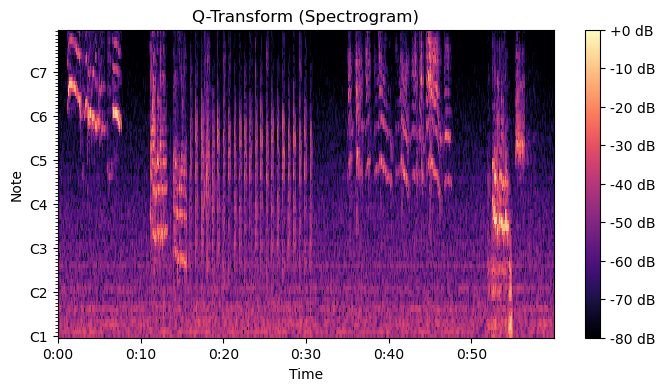

In [59]:
import librosa.display
import matplotlib.pyplot as plt

# Function to compute Q-transform and plot the spectrogram
def compute_and_plot_q_transform(audio_file, hop_length=512, sr=22050, fmin=None, n_bins=84):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=sr)
    
    # Compute Q-transform
    C = librosa.amplitude_to_db(librosa.cqt(y=y, sr=sr, hop_length=hop_length, fmin=fmin, n_bins=n_bins), ref=np.max)
    
    # Plot the Q-transform (spectrogram)
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(C, sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Q-Transform (Spectrogram)')
    plt.show()

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
compute_and_plot_q_transform(audio_file)


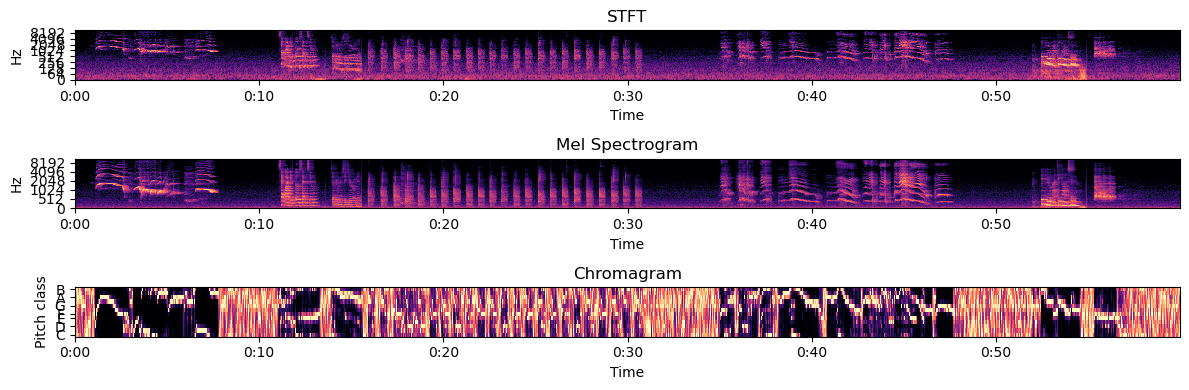

In [10]:
import librosa.display
import matplotlib.pyplot as plt

# Function to compute and plot multiple spectra for an audio file
def compute_and_plot_multiple_spectra(audio_file, hop_length=512, sr=22050, n_fft=2048, n_mels=128):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=sr)
    
    # Compute Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length))
    
    # Compute Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(S=stft, sr=sr, n_mels=n_mels)
    
    # Compute Chromagram
    chromagram = librosa.feature.chroma_stft(S=stft**2, sr=sr)
    
    # Plot STFT
    plt.figure(figsize=(12, 4))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.title('STFT')
    
    # Plot Mel Spectrogram
    plt.subplot(3, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(mel_spectrogram, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.title('Mel Spectrogram')
    
    # Plot Chromagram
    plt.subplot(3, 1, 3)
    librosa.display.specshow(chromagram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='chroma')
    plt.title('Chromagram')
    
    plt.tight_layout()
    plt.show()

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
compute_and_plot_multiple_spectra(audio_file)


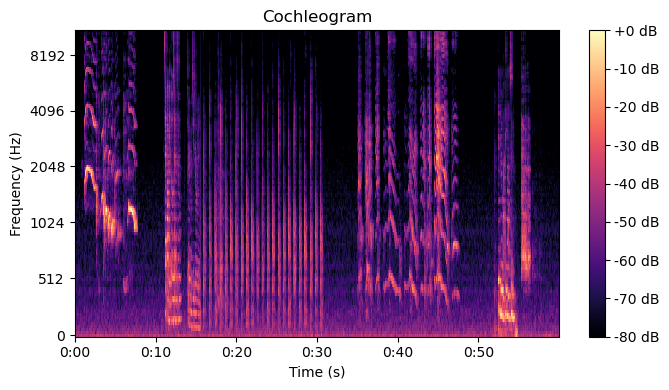

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"  # Replace this with the path to your audio file
y, sr = librosa.load(audio_file)

# Compute the cochleogram
n_fft = 2048  # Number of FFT points
hop_length = 512  # Hop length for spectrogram, controls time resolution
n_mels = 128  # Number of mel bands
fmin = 20  # Minimum frequency of the mel filterbank
fmax = 8000  # Maximum frequency of the mel filterbank

# Compute cochleogram using mel spectrogram
cochleogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=fmin, fmax=fmax)

# Convert power spectrogram to dB scale (log scale)
cochleogram_db = librosa.power_to_db(cochleogram, ref=np.max)

# Plot the cochleogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(cochleogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Cochleogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


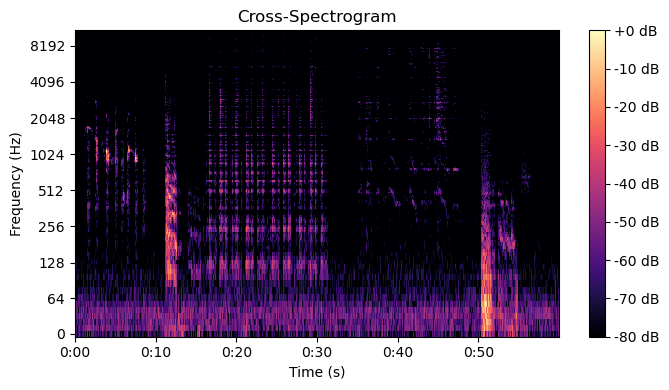

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio files
audio_file1 = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"  # Replace this with the path to your first audio file
audio_file2 = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix007_ov1.wav"  # Replace this with the path to your second audio file

y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Compute the cross-spectrogram
n_fft = 2048  # Number of FFT points
hop_length = 512  # Hop length for spectrogram, controls time resolution

# Compute spectrograms for both audio files
spec1 = librosa.stft(y1, n_fft=n_fft, hop_length=hop_length)
spec2 = librosa.stft(y2, n_fft=n_fft, hop_length=hop_length)

# Compute the cross-spectrogram
cross_spectrogram = spec1 * spec2.conj()

# Plot the cross-spectrogram
plt.figure(figsize=(7,4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.magphase(cross_spectrogram)[0], ref=np.max), sr=sr1, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Cross-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


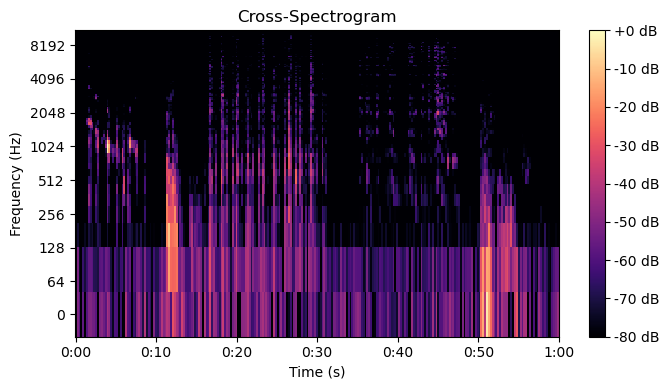

In [66]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio files
audio_file1 = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"  # Replace this with the path to your first audio file
audio_file2 = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix007_ov1.wav"  # Replace this with the path to your second audio file

y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Compute the cross-spectrogram
n_fft = 256  # Number of FFT points
hop_length = 5120  # Hop length for spectrogram, controls time resolution

# Compute spectrograms for both audio files
spec1 = librosa.stft(y1, n_fft=n_fft, hop_length=hop_length)
spec2 = librosa.stft(y2, n_fft=n_fft, hop_length=hop_length)

# Compute the cross-spectrogram
cross_spectrogram = spec1 * spec2.conj()

# Plot the cross-spectrogram
plt.figure(figsize=(7,4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.magphase(cross_spectrogram)[0], ref=np.max), sr=sr1, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Cross-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


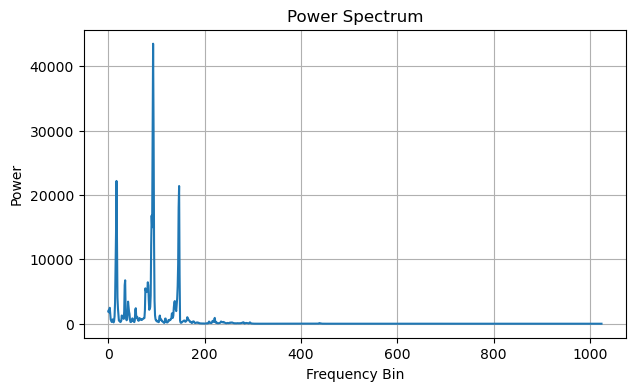

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to compute power spectrum from an audio file
def compute_power_spectrum(audio_file, n_fft=2048, hop_length=512):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=None)
    
    # Compute power spectrum using FFT
    power_spectrum = np.abs(librosa.stft(y=audio_signal, n_fft=n_fft, hop_length=hop_length)) ** 2
    
    # Sum the power across frequency bins to get the power spectrum
    power_spectrum = power_spectrum.sum(axis=1)
    
    return power_spectrum

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
power_spectrum = compute_power_spectrum(audio_file)

# Plot the power spectrum
plt.figure(figsize=(7, 4))
plt.plot(power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Power')
plt.grid(True)
plt.show()


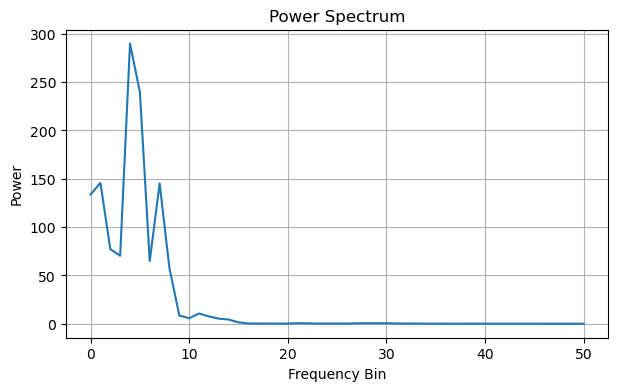

In [90]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to compute power spectrum from an audio file
def compute_power_spectrum(audio_file, n_fft=100, hop_length=512):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=None)
    
    # Compute power spectrum using FFT
    power_spectrum = np.abs(librosa.stft(y=audio_signal, n_fft=n_fft, hop_length=hop_length)) ** 2
    
    # Sum the power across frequency bins to get the power spectrum
    power_spectrum = power_spectrum.sum(axis=1)
    
    return power_spectrum

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
power_spectrum = compute_power_spectrum(audio_file)

# Plot the power spectrum
plt.figure(figsize=(7, 4))
plt.plot(power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Power')
plt.grid(True)
plt.show()


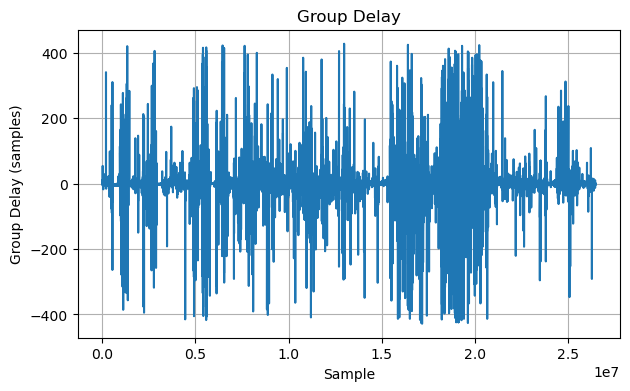

In [93]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
# Function to compute group delay from an audio file
def compute_group_delay(audio_file, fs=441000, window_size=1024, hop_size=512):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=fs)
    
    # Compute the group delay using Hilbert transform
    analytic_signal = signal.hilbert(audio_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    group_delay = -np.diff(instantaneous_phase) / (2 * np.pi * hop_size / fs)
    
    return group_delay

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
group_delay = compute_group_delay(audio_file)

# Plot the group delay
plt.figure(figsize=(7, 4))
plt.plot(group_delay)
plt.title('Group Delay')
plt.xlabel('Sample')
plt.ylabel('Group Delay (samples)')
plt.grid(True)
plt.show()


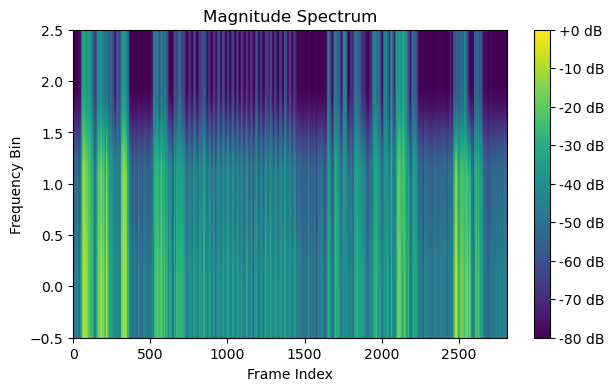

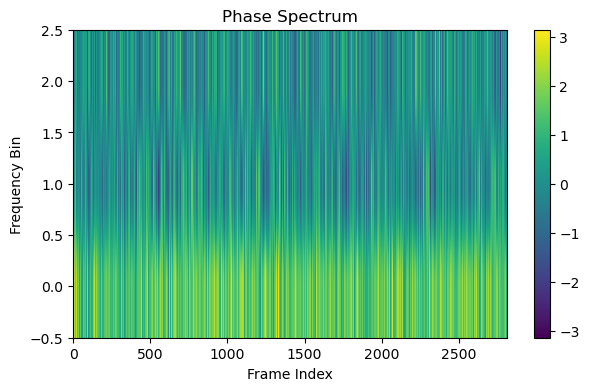

In [98]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to compute phase and magnitude spectra from an audio file
def compute_phase_magnitude_spectra(audio_file, n_fft=5, hop_length=512):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=None)
    
    # Compute Short-Time Fourier Transform (STFT)
    stft = librosa.stft(y=audio_signal, n_fft=n_fft, hop_length=hop_length)
    
    # Compute magnitude and phase spectra
    magnitude_spectrum = np.abs(stft)
    phase_spectrum = np.angle(stft)
    
    return magnitude_spectrum, phase_spectrum

# Example usage
audio_file =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
magnitude_spectrum, phase_spectrum = compute_phase_magnitude_spectra(audio_file)

# Plot the magnitude spectrum
plt.figure(figsize=(7, 4))
plt.imshow(librosa.amplitude_to_db(magnitude_spectrum, ref=np.max), aspect='auto', origin='lower')
plt.title('Magnitude Spectrum')
plt.xlabel('Frame Index')
plt.ylabel('Frequency Bin')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Plot the phase spectrum
plt.figure(figsize=(7, 4))
plt.imshow(phase_spectrum, aspect='auto', origin='lower')
plt.title('Phase Spectrum')
plt.xlabel('Frame Index')
plt.ylabel('Frequency Bin')
plt.colorbar()
plt.show()


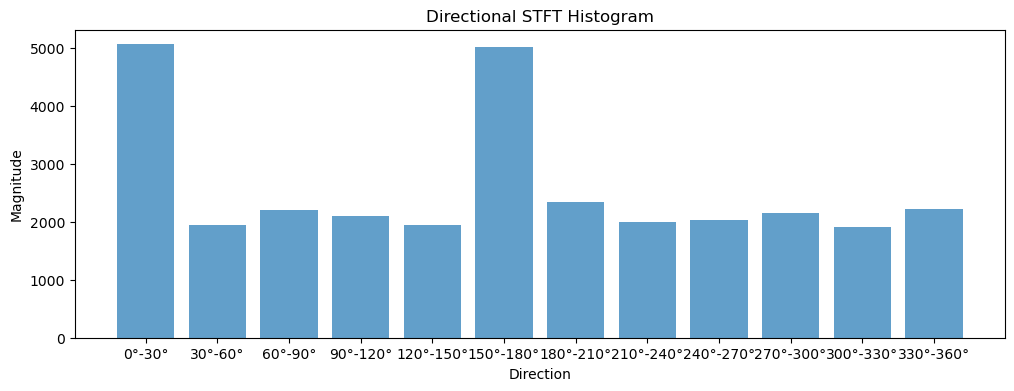

In [18]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to compute directional STFT and plot its histogram
def compute_and_plot_directional_stft_histogram(audio_file, n_fft=20, hop_length=512, num_directions=12):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=None)
    
    # Compute STFT
    stft = librosa.stft(y=audio_signal, n_fft=n_fft, hop_length=hop_length, center=False)
    
    # Calculate angles corresponding to each bin
    angles = np.angle(stft)
    
    # Map angles to [0, 2π) range
    angles = (angles + 2 * np.pi) % (2 * np.pi)
    
    # Quantize angles into 'num_directions' bins
    quantized_angles = np.floor_divide(angles, 2 * np.pi / num_directions)
    
    # Compute the histogram
    directional_histogram = np.histogram(quantized_angles, bins=num_directions, range=(0, num_directions))[0]
    
    # Plot histogram
    plt.figure(figsize=(12, 4))
    plt.bar(np.arange(num_directions), directional_histogram, align='center', alpha=0.7)
    plt.xlabel('Direction')
    plt.ylabel('Magnitude')
    plt.title('Directional STFT Histogram')
    plt.xticks(np.arange(num_directions), [f"{i*360/num_directions:.0f}°-{(i+1)*360/num_directions:.0f}°" for i in range(num_directions)])
    plt.show()

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix010_ov1.wav"
compute_and_plot_directional_stft_histogram(audio_file)


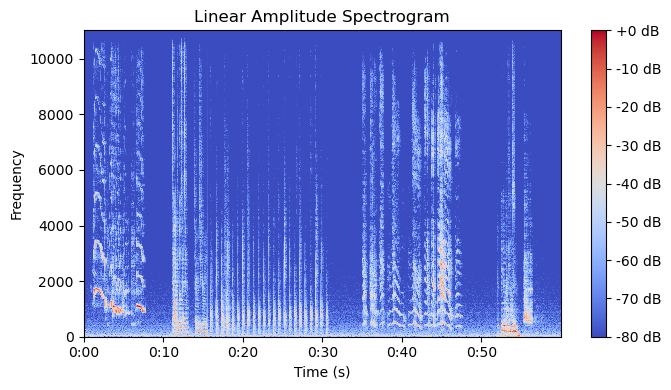

In [99]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path)

# Compute the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear Amplitude Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


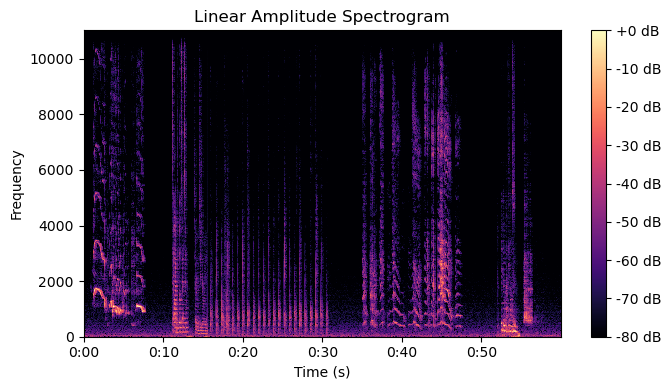

In [100]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path)

# Compute the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear Amplitude Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


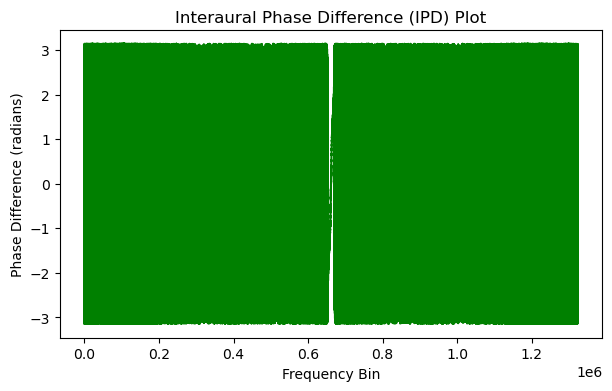

In [20]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the stereo audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix002_ov1.wav"
y, sr = librosa.load(audio_file_path, mono=False)

# Compute the interaural time difference (ITD)
itd = np.argmax(y[1, :] - y[0, :])

# Compute the IPD
ipd = np.angle(np.fft.fft(y[1, :]) / np.fft.fft(y[0, :]))

# Create the IPD plot
plt.figure(figsize=(7, 4))
plt.plot(ipd, color='g')
plt.title('Interaural Phase Difference (IPD) Plot')
plt.xlabel('Frequency Bin')
plt.ylabel('Phase Difference (radians)')
plt.show()


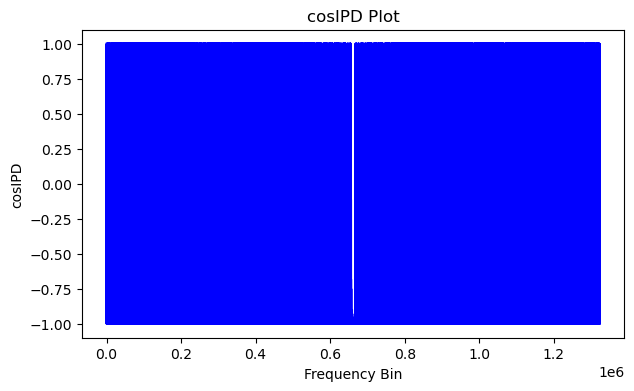

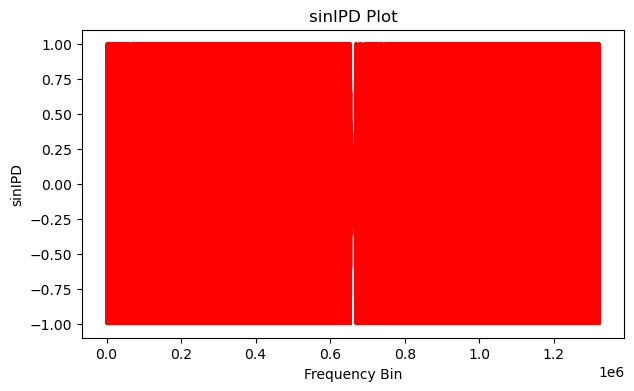

In [21]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the stereo audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, mono=False)

# Compute the interaural time difference (ITD)
itd = np.argmax(y[1, :] - y[0, :])

# Compute the IPD
ipd = np.angle(np.fft.fft(y[1, :]) / np.fft.fft(y[0, :]))

# Compute cosIPD and sinIPD
cos_ipd = np.cos(ipd)
sin_ipd = np.sin(ipd)

# Create the cosIPD plot
plt.figure(figsize=(7, 4))
plt.plot(cos_ipd, color='b')
plt.title('cosIPD Plot')
plt.xlabel('Frequency Bin')
plt.ylabel('cosIPD')
plt.show()

# Create the sinIPD plot
plt.figure(figsize=(7, 4))
plt.plot(sin_ipd, color='r')
plt.title('sinIPD Plot')
plt.xlabel('Frequency Bin')
plt.ylabel('sinIPD')
plt.show()


E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav


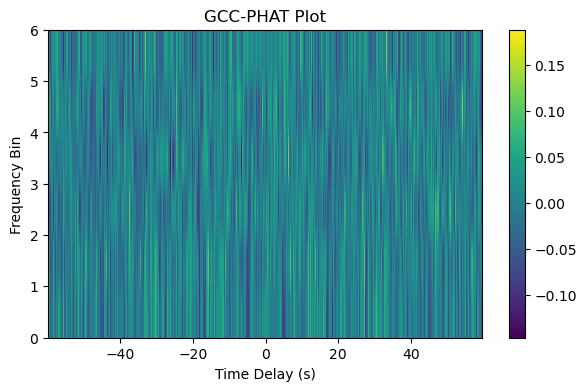

In [22]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio files
audio_file1 =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
audio_file2 =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix010_ov1.wav"
print(audio_file1)
# Load audio files and compute STFT
y1, sr1 = librosa.load(audio_file1, mono=True)
y2, sr2 = librosa.load(audio_file2, mono=True)
n_fft = 10
hop_length = 5120

# Compute STFT for both audio signals
D1 = librosa.stft(y1, n_fft=n_fft, hop_length=hop_length)
D2 = librosa.stft(y2, n_fft=n_fft, hop_length=hop_length)

# Compute the cross-correlation using GCC-PHAT
cross_correlation = np.fft.irfft(D1 * np.conj(D2) / np.abs(D1 * np.conj(D2)), axis=1)

# Compute time delays
tau = np.arange(-cross_correlation.shape[1] // 2, cross_correlation.shape[1] // 2) * hop_length / sr1

# Plot the GCC-PHAT plot
plt.figure(figsize=(7, 4))
plt.imshow(cross_correlation, aspect='auto', extent=[tau[0], tau[-1], 0, cross_correlation.shape[0]], origin='lower')
plt.colorbar()
plt.title('GCC-PHAT Plot')
plt.xlabel('Time Delay (s)')
plt.ylabel('Frequency Bin')
plt.show()


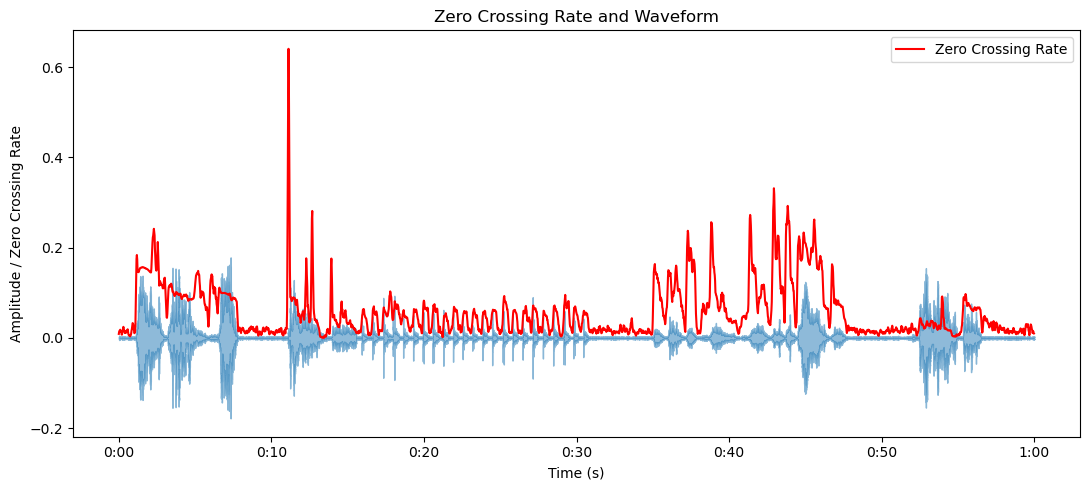

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Compute zero crossing rate
zero_crossings_rate = librosa.feature.zero_crossing_rate(y)[0]

# Plot zero crossing rate
plt.figure(figsize=(11, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(librosa.times_like(zero_crossings_rate), zero_crossings_rate, label='Zero Crossing Rate', color='r')
plt.title('Zero Crossing Rate and Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Zero Crossing Rate')
plt.legend()
plt.tight_layout()
plt.show()


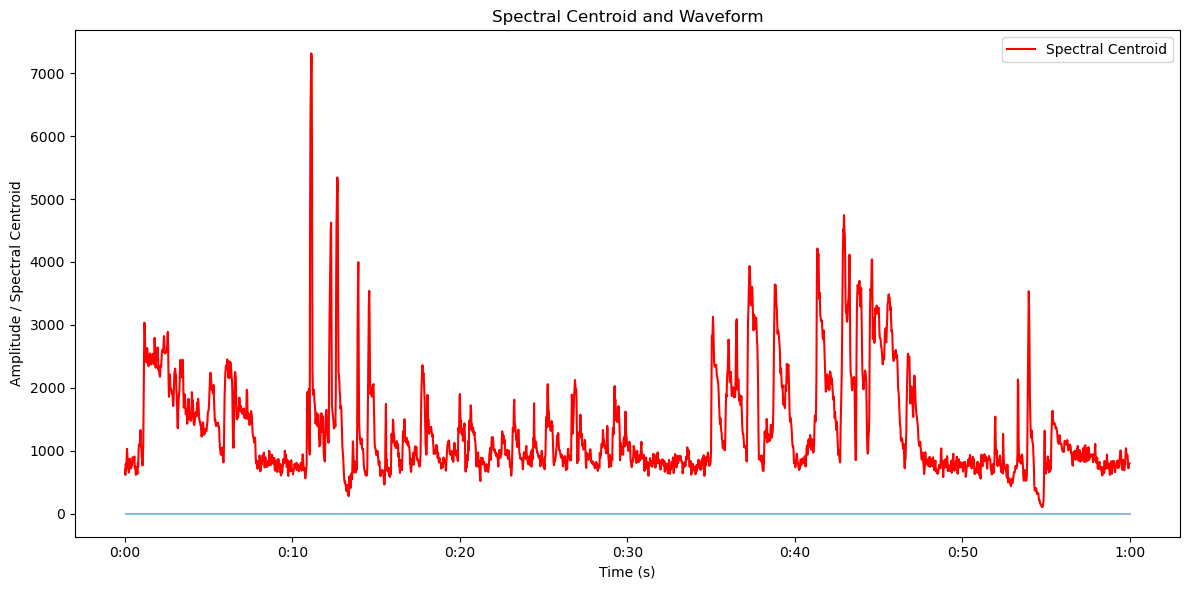

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Compute spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Compute times for visualization
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)

# Plot spectral centroid
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, spectral_centroid, label='Spectral Centroid', color='r')
plt.title('Spectral Centroid and Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Centroid')
plt.legend()
plt.tight_layout()
plt.show()


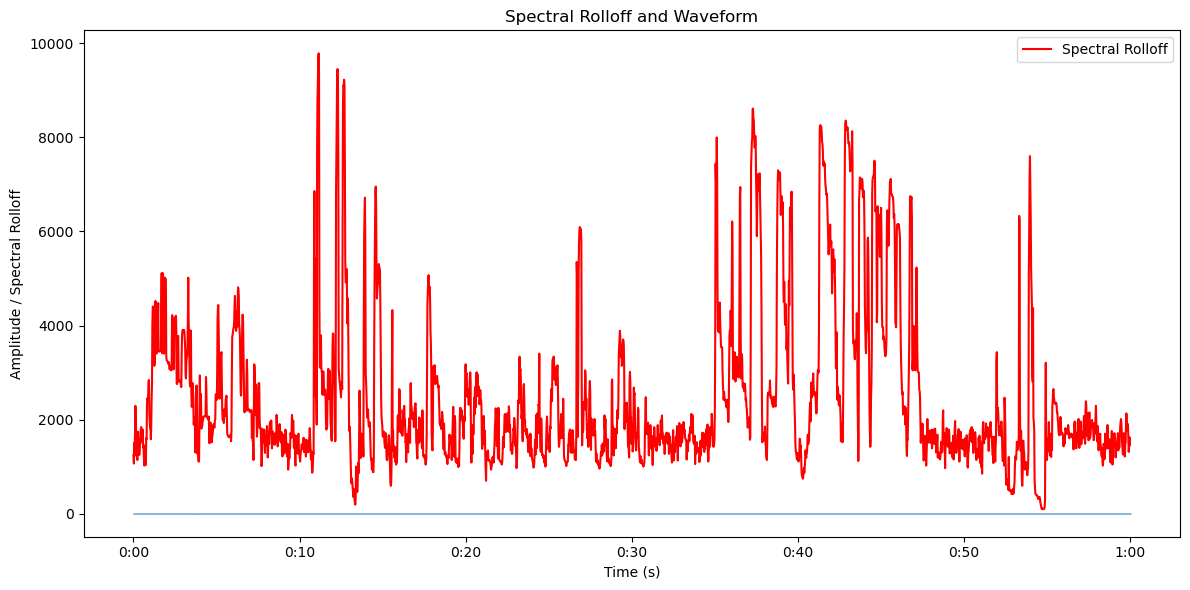

In [25]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Compute spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)[0]

# Compute times for visualization
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

# Plot spectral rolloff
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, spectral_rolloff, label='Spectral Rolloff', color='r')
plt.title('Spectral Rolloff and Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Rolloff')
plt.legend()
plt.tight_layout()
plt.show()


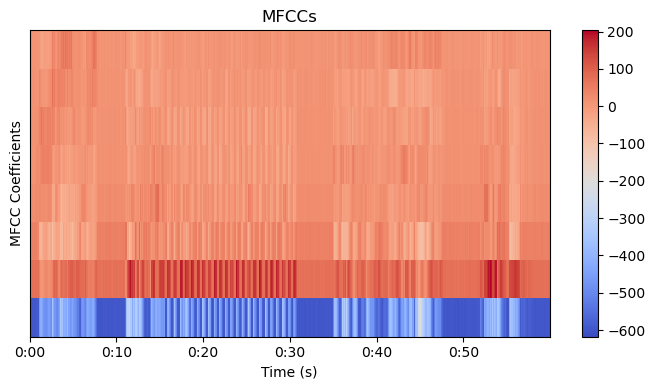

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)

# Display the MFCCs
plt.figure(figsize=(7, 4))
librosa.display.specshow(mfccs, x_axis='time',cmap='coolwarm')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


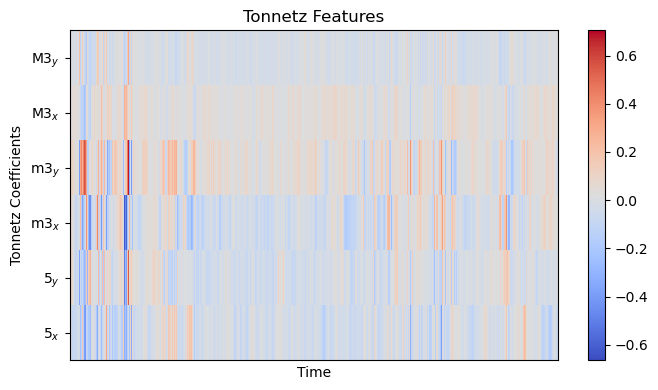

In [101]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Extract tonnetz features
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# Plot tonnetz features
plt.figure(figsize=(7, 4))
librosa.display.specshow(tonnetz, y_axis='tonnetz')
plt.colorbar()
plt.title('Tonnetz Features')
plt.xlabel('Time')
plt.ylabel('Tonnetz Coefficients')
plt.tight_layout()
plt.show()


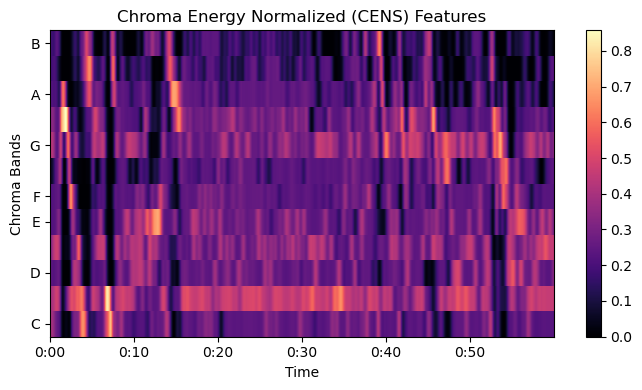

In [52]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Extract CENS features
cens = librosa.feature.chroma_cens(y=y, sr=sr)

# Plot CENS features
plt.figure(figsize=(7, 4))
librosa.display.specshow(cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Energy Normalized (CENS) Features')
plt.xlabel('Time')
plt.ylabel('Chroma Bands')
plt.tight_layout()
plt.show()


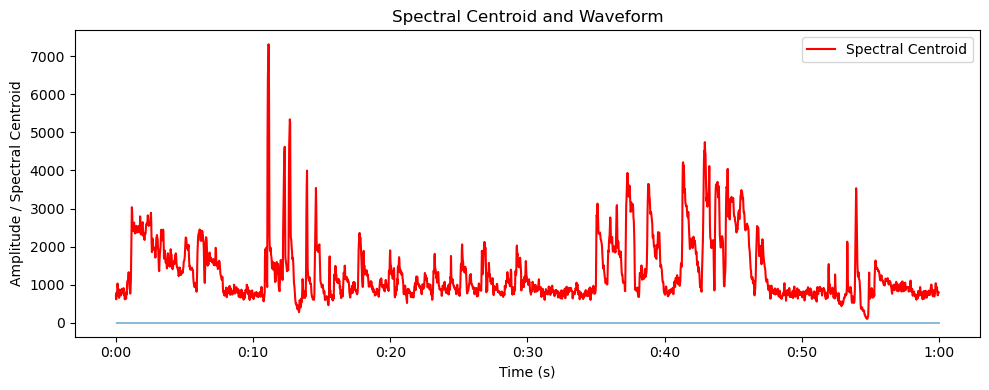

In [54]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Extract spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Compute times for visualization
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)

# Plot spectral centroid
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, spectral_centroid, label='Spectral Centroid', color='r')
plt.title('Spectral Centroid and Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Centroid')
plt.legend()
plt.tight_layout()
plt.show()


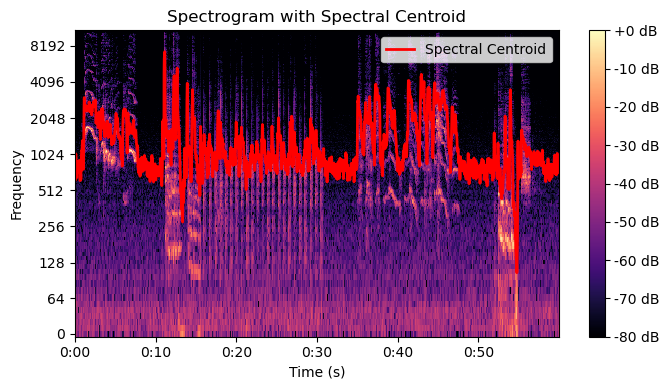

In [102]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Compute the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Extract spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Compute times for visualization
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)

# Plot spectrogram and overlay spectral centroid
plt.figure(figsize=(7, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.plot(t, spectral_centroid, label='Spectral Centroid', color='r', linewidth=2)
plt.title('Spectrogram with Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


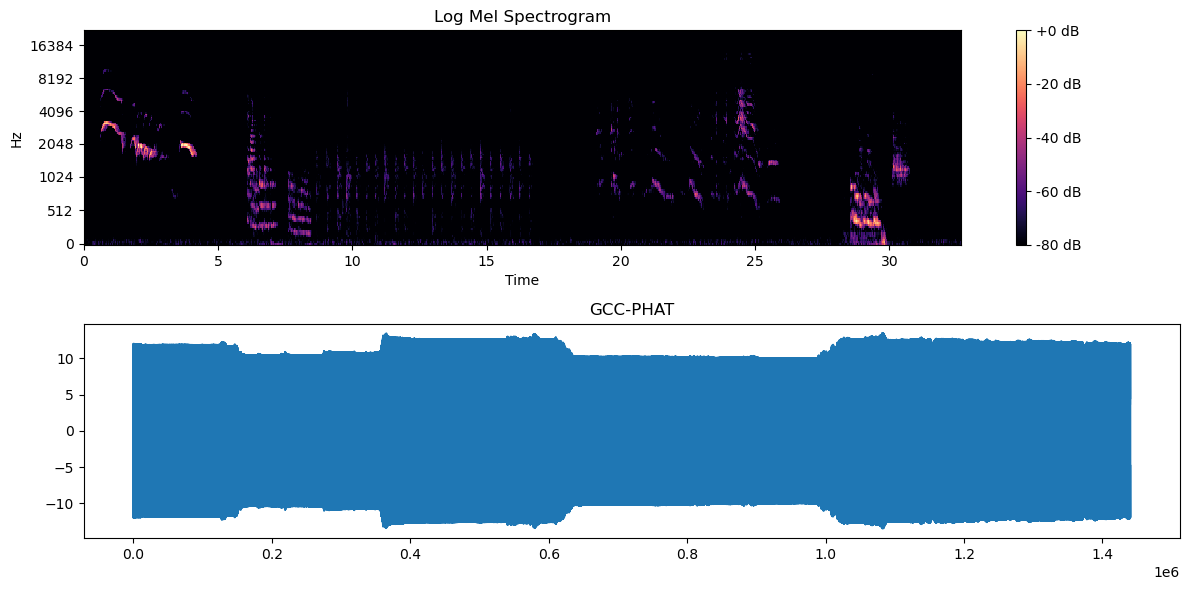

In [103]:
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to compute GCC-PHAT
def compute_gcc_phat(signal1, signal2):
    # Compute the cross-correlation using the FFT-based method (GCC-PHAT)
    fft_signal1 = np.fft.fft(signal1)
    fft_signal2 = np.fft.fft(signal2.conj())
    cross_corr = np.fft.ifft(fft_signal1 * fft_signal2).real
    cross_corr = np.fft.fftshift(cross_corr)  # Shift the zero lag to the center
    return cross_corr

# Load audio file
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
audio_signal, _ = librosa.load(audio_file, sr=None)

# Compute Mel spectrogram
n_fft = 2048
hop_length = 512
mel_spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=44100, n_fft=n_fft, hop_length=hop_length)

# Compute GCC-PHAT
reference_signal = np.sin(2 * np.pi * 1000 * np.arange(len(audio_signal)) / 44100)  # Example reference signal
gcc_phat = compute_gcc_phat(audio_signal, reference_signal)

# Plot Mel spectrogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(mel_spectrogram, ref=np.max), sr=44100, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel Spectrogram')

# Plot GCC-PHAT
plt.subplot(2, 1, 2)
plt.plot(gcc_phat)
plt.title('GCC-PHAT')

plt.tight_layout()
plt.show()


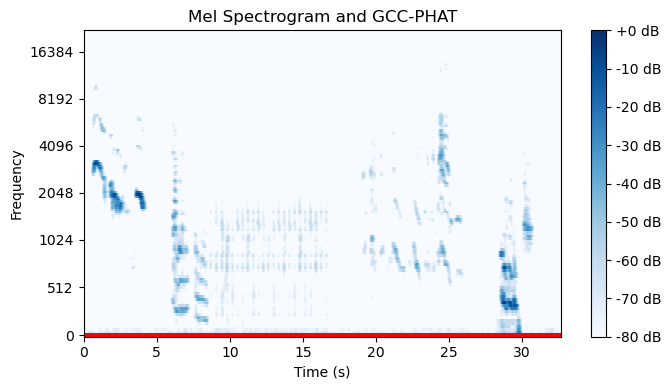

In [56]:
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to compute GCC-PHAT
def compute_gcc_phat(signal1, signal2):
    # Compute the cross-correlation using the FFT-based method (GCC-PHAT)
    fft_signal1 = np.fft.fft(signal1)
    fft_signal2 = np.fft.fft(signal2.conj())
    cross_corr = np.fft.ifft(fft_signal1 * fft_signal2).real
    cross_corr = np.fft.fftshift(cross_corr)  # Shift the zero lag to the center
    return cross_corr

# Load audio file
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
audio_signal, _ = librosa.load(audio_file, sr=None)

# Compute Mel spectrogram
n_fft = 20000
hop_length = 512
mel_spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=44100, n_fft=n_fft, hop_length=hop_length)

# Compute GCC-PHAT
reference_signal = np.sin(2 * np.pi * 1000 * np.arange(len(audio_signal)) / 44100)  # Example reference signal
gcc_phat = compute_gcc_phat(audio_signal, reference_signal)

# Plot both Mel spectrogram and GCC-PHAT on a single graph
plt.figure(figsize=(7, 4))

# Plot Mel spectrogram in blue color
librosa.display.specshow(librosa.amplitude_to_db(mel_spectrogram, ref=np.max), sr=44100, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='Blues')

# Plot GCC-PHAT in red color, aligned with the Mel spectrogram
plt.plot(np.linspace(0, len(audio_signal) / 44100, len(gcc_phat)), gcc_phat, color='red')

plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram and GCC-PHAT')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [104]:
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to compute directional STFT and plot its histogram
def compute_and_plot_directional_stft_histogram(audio_file, n_fft=2048, hop_length=512, num_directions=12):
    # Load audio file
    audio_signal, _ = librosa.load(audio_file, sr=None)
    
    # Compute Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=44100, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    
    # Create directional STFT
    reference_signal = np.sin(2 * np.pi * 1000 * np.arange(len(audio_signal)) / 44100)  # Example reference signal
    directional_stft = signal.convolve(audio_signal, reference_signal[::-1], mode='same')
    
    # Calculate angles corresponding to each direction
    directions = np.linspace(0, 2 * np.pi, num_directions + 1)[:-1]
    
    # Quantize angles into 'num_directions' bins
    quantized_angles = np.floor_divide(directions, 2 * np.pi / num_directions)
    
    # Compute the directional components of the STFT
    directional_components = np.zeros((num_directions, len(audio_signal)))
    for i in range(num_directions):
        angle_low = directions[i]
        angle_high = directions[i + 1]
        indices = np.where((angle_low <= np.angle(directional_stft)) & (np.angle(directional_stft) < angle_high))
        directional_components[i, indices] = np.abs(directional_stft[indices])
    
    # Plot Mel spectrogram
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=44100, hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log Mel Spectrogram')
    
    # Plot Directional STFT Histogram
    plt.subplot(2, 1, 2)
    for i in range(num_directions):
        plt.plot(np.arange(len(audio_signal)) / 44100, directional_components[i], label=f'Direction {i + 1}')
    plt.title('Directional STFT Histogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Example usage
audio_file = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
compute_and_plot_directional_stft_histogram(audio_file)


IndexError: index 12 is out of bounds for axis 0 with size 12

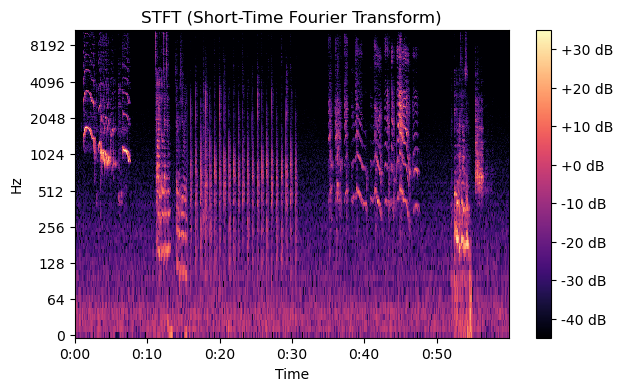

In [106]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path)

# Compute STFT
D = librosa.stft(y)

# Convert to dB scale
D_db = librosa.amplitude_to_db(abs(D))

# Plot STFT
plt.figure(figsize=(7, 4))
librosa.display.specshow(D_db, x_axis='time', y_axis='log')  # Use log frequency axis
plt.colorbar(format='%+2.0f dB')
plt.title('STFT (Short-Time Fourier Transform)')
plt.show()


In [48]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load your audio file
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path)

# Compute log mel spectrogram
n_fft = 2048
hop_length = 512
n_mels = 128
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
log_mel_spectrogram = np.log(mel_spectrogram + 1e-9)  # Adding a small constant to avoid log(0)

# Compute direction STF spectrogram (replace this with your own computation logic)
direction_stf_spectrogram = compute_direction_stf_spectrogram(y, sr, n_fft, hop_length)

# Plot both spectrograms on the same plot
plt.figure(figsize=(12, 6))

# Plot log mel spectrogram
plt.imshow(log_mel_spectrogram, aspect='auto', origin='lower', cmap='viridis')

# Plot direction STF spectrogram as contours on top of log mel spectrogram
contour_levels = np.linspace(direction_stf_spectrogram.min(), direction_stf_spectrogram.max(), 10)
plt.contour(direction_stf_spectrogram, levels=contour_levels, colors='red', linewidths=0.5, extent=[0, 256, 0, 128])

plt.title('Log Mel Spectrogram with Direction STF Contours')
plt.xlabel('Frame')
plt.ylabel('Mel Filter')

# Add colorbars
plt.colorbar(label='Log Magnitude', orientation='vertical', pad=0.02)
plt.colorbar(label='Direction STF Magnitude', orientation='vertical', pad=0.02)

plt.tight_layout()
plt.show()


NameError: name 'compute_direction_stf_spectrogram' is not defined

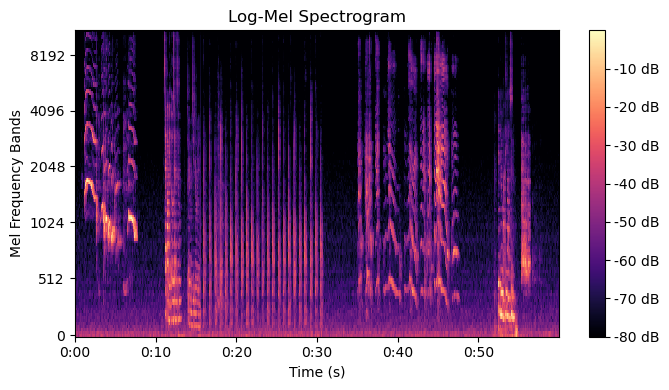

In [41]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path)

# Compute log-mel spectrogram
n_mels = 128
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale

# Compute directional sound source spectrogram (example)
# Replace the following line with your code for directional sound source spectrogram computation
# directional_spec = compute_directional_spectrogram(y, sr)

# Plot log-mel spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency Bands')
plt.tight_layout()
plt.show()

# Plot directional sound source spectrogram
# Replace 'directional_spec' with your computed directional sound source spectrogram
# plt.figure(figsize=(12, 6))
# librosa.display.specshow(directional_spec, sr=sr, x_axis='time', y_axis='linear')  # Adjust y_axis as needed
# plt.colorbar(format='%+2.0f dB')
# plt.title('Directional Sound Source Spectrogram')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency Bins')
# plt.tight_layout()
# plt.show()


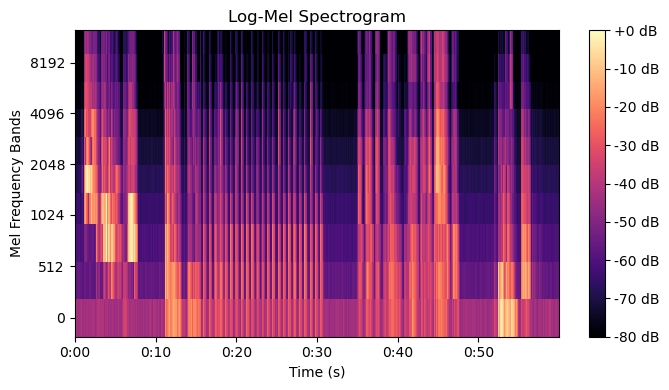

In [47]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path)

# Compute log-mel spectrogram
n_mels = 10
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale

# Compute directional sound source spectrogram (example)
# Replace the following line with your code for directional sound source spectrogram computation
# directional_spec = compute_directional_spectrogram(y, sr)

# Plot log-mel spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency Bands')
plt.tight_layout()
plt.show()

# Plot directional sound source spectrogram
# Replace 'directional_spec' with your computed directional sound source spectrogram
# plt.figure(figsize=(12, 6))
# librosa.display.specshow(directional_spec, sr=sr, x_axis='time', y_axis='linear')  # Adjust y_axis as needed
# plt.colorbar(format='%+2.0f dB')
# plt.title('Directional Sound Source Spectrogram')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency Bins')
# plt.tight_layout()
# plt.show()


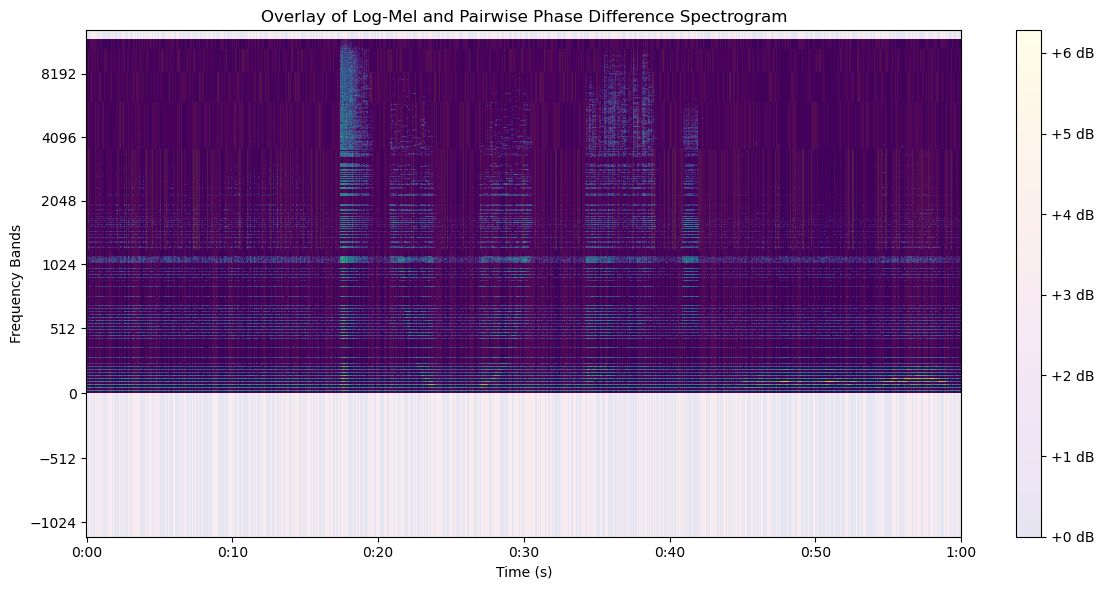

In [29]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file (mono)
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix010_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute log-mel spectrogram
n_mels = 2560
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale

# Compute pairwise phase difference spectrogram
n_fft = 10
hop_length = 512

# Calculate the short-time Fourier transform (STFT) phase
stft_phase = np.angle(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# Calculate the phase difference between adjacent time frames
phase_diff = np.diff(stft_phase, axis=1)

# Compute the magnitude of pairwise phase difference
pairwise_phase_diff_spec = np.abs(phase_diff)

# Plot overlay of log-mel and pairwise phase difference spectrograms
plt.figure(figsize=(12, 6))

# Plot log-mel spectrogram
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')

# Overlay pairwise phase difference spectrogram
librosa.display.specshow(pairwise_phase_diff_spec, sr=sr, x_axis='time', y_axis='linear', cmap='plasma', alpha=0.1)  # Adjust colormap and alpha as needed

plt.colorbar(format='%+2.0f dB')
plt.title('Overlay of Log-Mel and Pairwise Phase Difference Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bands')
plt.tight_layout()
plt.show()


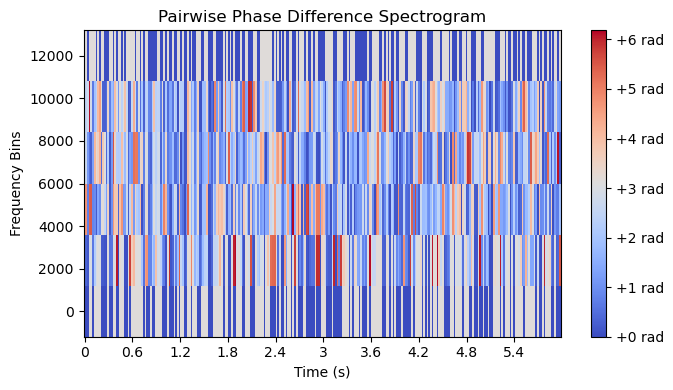

In [30]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file (mono)
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix009_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute the short-time Fourier transform (STFT)
n_fft = 10
hop_length = 5120
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Calculate the phase of STFT
stft_phase = np.angle(stft)

# Calculate the phase difference between adjacent frames
phase_diff = np.diff(stft_phase, axis=1)

# Compute the magnitude of pairwise phase difference
pairwise_phase_diff_spec = np.abs(phase_diff)

# Plot pairwise phase difference spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(pairwise_phase_diff_spec, sr=sr, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.colorbar(format='%+2.0f rad')
plt.title('Pairwise Phase Difference Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bins')
plt.tight_layout()
plt.show()


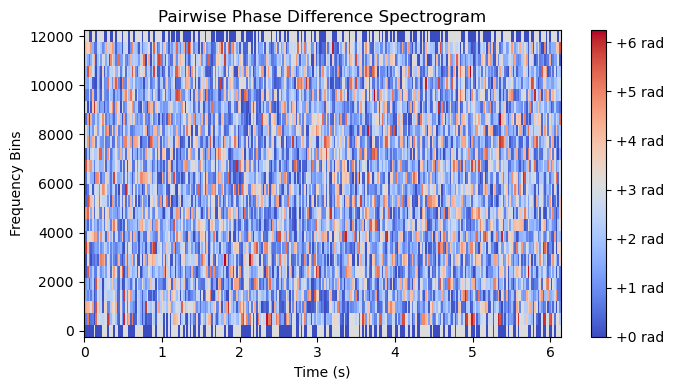

In [40]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file (mono)
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute the short-time Fourier transform (STFT)
n_fft = 50  # Reduced n_fft for higher-frequency resolution
hop_length = 5000  # Smaller hop_length for more frames
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Calculate the phase of STFT
stft_phase = np.angle(stft)

# Calculate the phase difference between adjacent frames
phase_diff = np.diff(stft_phase, axis=1)

# Compute the magnitude of pairwise phase difference
pairwise_phase_diff_spec = np.abs(phase_diff)

# Plot pairwise phase difference spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(pairwise_phase_diff_spec, sr=sr, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.colorbar(format='%+2.0f rad')
plt.title('Pairwise Phase Difference Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bins')
plt.tight_layout()
plt.show()


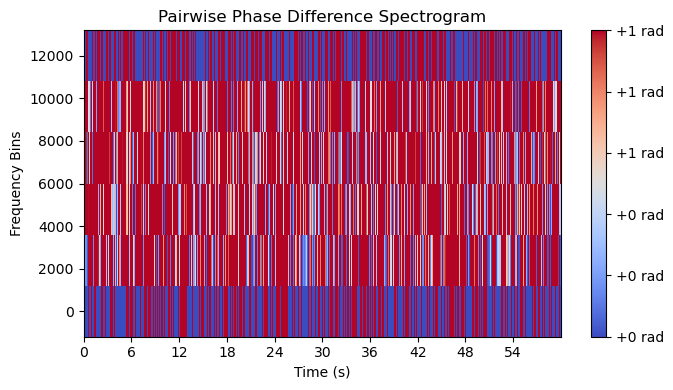

In [36]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file (mono)
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute the short-time Fourier transform (STFT)
n_fft = 10  # Reduced n_fft for higher-frequency resolution
hop_length = 512  # Smaller hop_length for more frames
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Calculate the phase of STFT
stft_phase = np.angle(stft)

# Calculate the phase difference between adjacent frames
phase_diff = np.diff(stft_phase, axis=1)

# Compute the magnitude of pairwise phase difference
pairwise_phase_diff_spec = np.abs(phase_diff)

# Plot pairwise phase difference spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(pairwise_phase_diff_spec, sr=sr, x_axis='time', y_axis='linear', cmap='coolwarm', vmax=1.0, vmin=0.0)
plt.colorbar(format='%+2.0f rad')
plt.title('Pairwise Phase Difference Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bins')
plt.tight_layout()
plt.show()


In [32]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file (mono)
audio_file_path = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute log-mel spectrogram
n_mels = 128
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale

# Compute GCC-PHAT spectrogram
# You need two signals for GCC-PHAT, let's assume you have another signal y2
y2 = np.roll(y, shift=5000)  # Example: Shift the signal for demonstration
gcc_phat = librosa.core.phase_align(y, y2, sr=sr)

# Plot log-mel spectrogram
plt.figure(figsize=(12, 6))

# Plot log-mel spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')

# Plot GCC-PHAT spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(gcc_phat, sr=sr, x_axis='time', y_axis='frames', cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(format='%+2.0f')
plt.title('GCC-PHAT Spectrogram')

plt.tight_layout()
plt.show()


AttributeError: No librosa.core attribute phase_align

IndexError: tuple index out of range

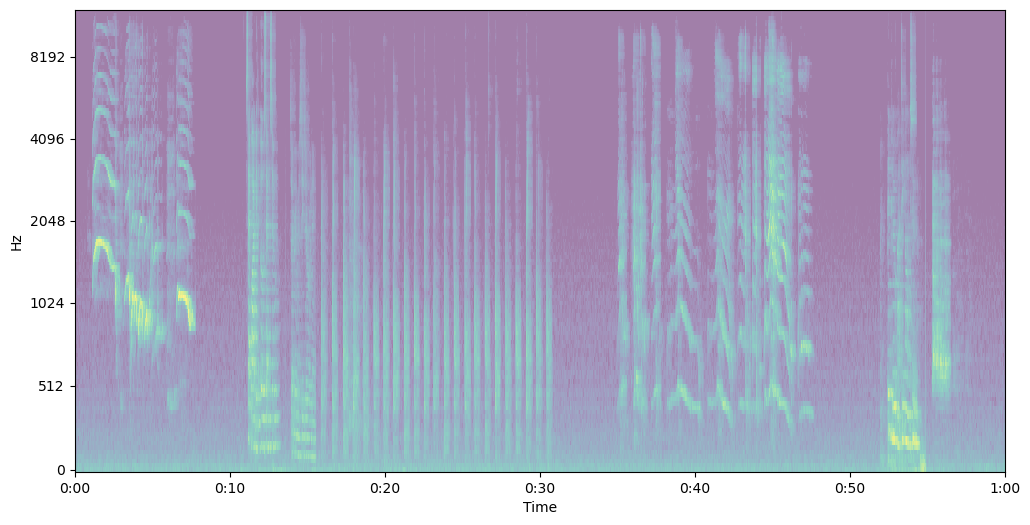

In [33]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file (mono)
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute log-mel spectrogram
n_mels = 128
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale

# Compute GCC-PHAT spectrogram using cross-correlation and phase transform
def gcc_phat(s1, s2):
    corr = np.fft.irfft(np.fft.rfft(s1) * np.conj(np.fft.rfft(s2)))
    phat = corr / np.abs(corr)
    return phat

# Example: Shift the signal for demonstration
y_shifted = np.roll(y, shift=5000)

# Compute GCC-PHAT spectrogram
gcc_phat_spec = gcc_phat(y, y_shifted)

# Plot overlay of log-mel and GCC-PHAT spectrograms
plt.figure(figsize=(12, 6))

# Plot log-mel spectrogram with alpha (transparency) set to 0.5
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel', cmap='viridis', alpha=0.5)

# Overlay GCC-PHAT spectrogram with alpha (transparency) set to 0.5
librosa.display.specshow(gcc_phat_spec, sr=sr, x_axis='time', y_axis='frames', cmap='coolwarm', alpha=0.5)

plt.colorbar(format='%+2.0f dB')
plt.title('Overlay of Log-Mel and GCC-PHAT Spectrograms')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bands')
plt.tight_layout()
plt.show()


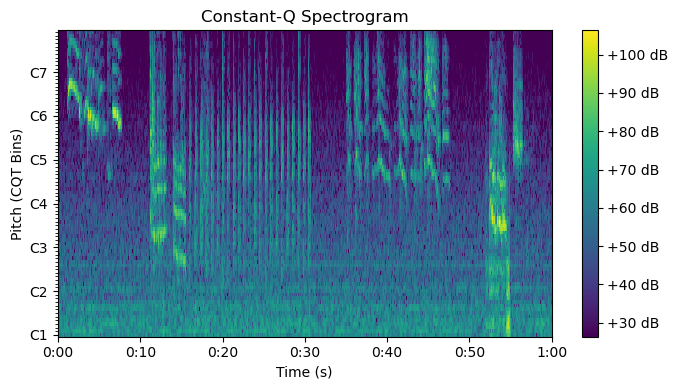

In [108]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute Constant-Q spectrogram
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.min)  # Convert to dB scale for visualization

# Plot Constant-Q spectrogram
plt.figure(figsize=(7, 4))
librosa.display.specshow(CQT, sr=sr, x_axis='time', y_axis='cqt_note', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (CQT Bins)')
plt.tight_layout()
plt.show()


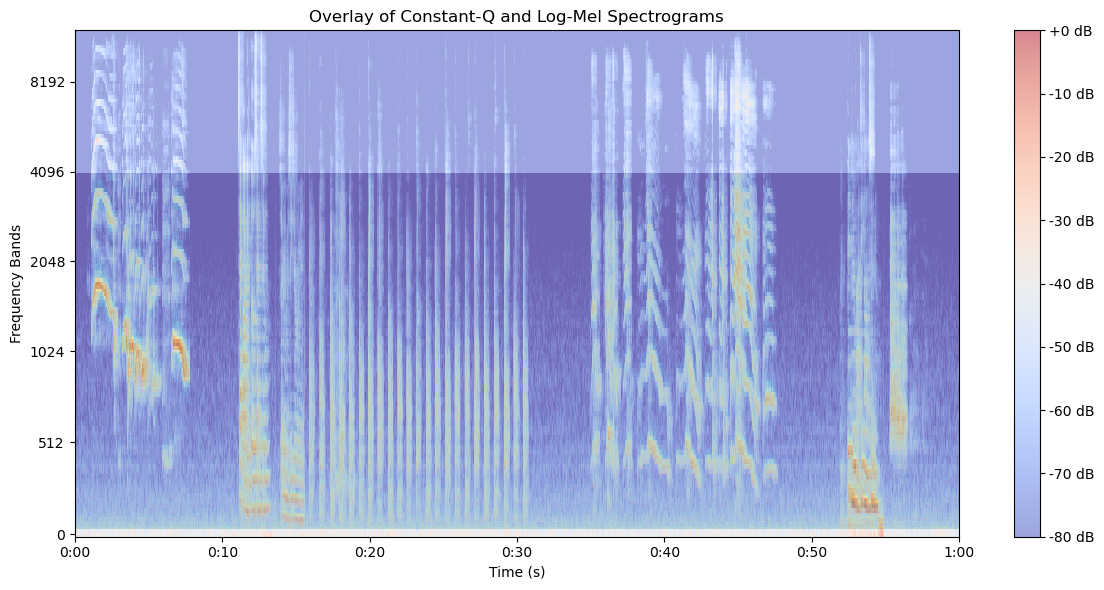

In [34]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file_path =  r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
y, sr = librosa.load(audio_file_path, sr=None)

# Compute Constant-Q spectrogram
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)  # Convert to dB scale for visualization

# Compute log-mel spectrogram
n_mels = 128
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale for visualization

# Plot overlay of Constant-Q and log-mel spectrograms
plt.figure(figsize=(12, 6))

# Plot Constant-Q spectrogram with alpha (transparency) set to 0.5
librosa.display.specshow(CQT, sr=sr, x_axis='time', y_axis='cqt_note', cmap='viridis', alpha=0.5)

# Overlay log-mel spectrogram with alpha (transparency) set to 0.5
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm', alpha=0.5)

plt.colorbar(format='%+2.0f dB')
plt.title('Overlay of Constant-Q and Log-Mel Spectrograms')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bands')
plt.tight_layout()
plt.show()


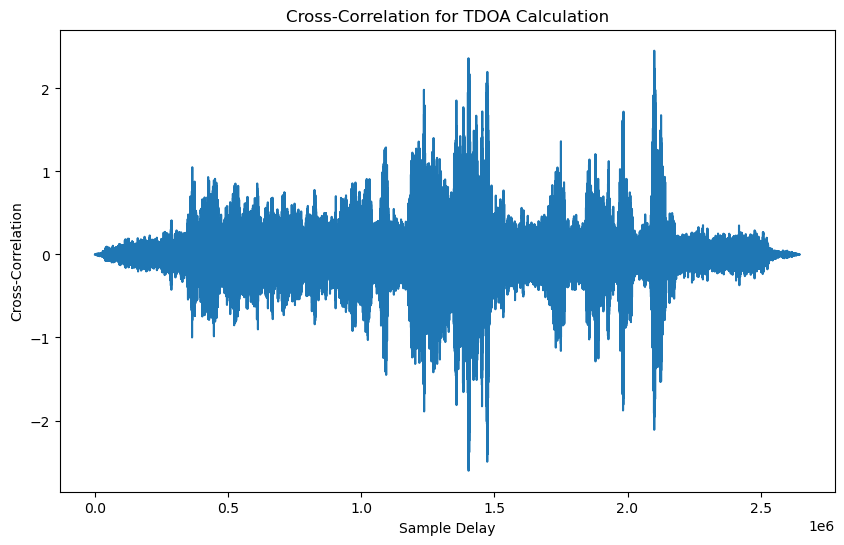

Time Delay (TDOA) between microphones: 35.256236 seconds


In [110]:
import numpy as np
import scipy.signal
import librosa
import matplotlib.pyplot as plt

# Paths to your audio files recorded by two microphones
audio_file_mic1 = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix001_ov1.wav"
audio_file_mic2 = r"E:\seld-dcase2020\dataset\foa_dev\fold1_room1_mix010_ov1.wav"

# Load audio files
y1, sr1 = librosa.load(audio_file_mic1)
y2, sr2 = librosa.load(audio_file_mic2)

# Calculate cross-correlation to find time delay (TDOA)
cross_correlation = np.correlate(y1, y2, mode='full')
delay = cross_correlation.argmax() - len(y1)  # TDOA in samples

# Convert sample delay to time delay in seconds
sampling_rate = sr1  # Assuming both microphones have the same sampling rate
time_delay_seconds = delay / sampling_rate

# Plot cross-correlation for visualization
plt.figure(figsize=(10, 6))
plt.plot(cross_correlation)
plt.xlabel('Sample Delay')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation for TDOA Calculation')
plt.show()

print(f'Time Delay (TDOA) between microphones: {time_delay_seconds:.6f} seconds')


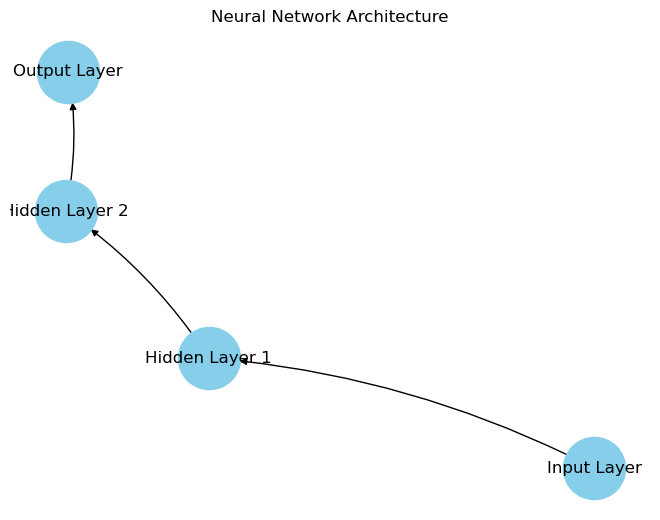

In [111]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Input Layer")
G.add_node("Hidden Layer 1")
G.add_node("Hidden Layer 2")
G.add_node("Output Layer")

# Add edges
G.add_edges_from([("Input Layer", "Hidden Layer 1"),
                  ("Hidden Layer 1", "Hidden Layer 2"),
                  ("Hidden Layer 2", "Output Layer")])

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Define node positions
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, arrows=True, connectionstyle="arc3,rad=0.1")
plt.title("Neural Network Architecture")
plt.show()


In [113]:
pip install graphviz


  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
